In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


In [2]:
customers = pd.read_csv("Ecommerce Customers")

Let's make some exploratory data analysis

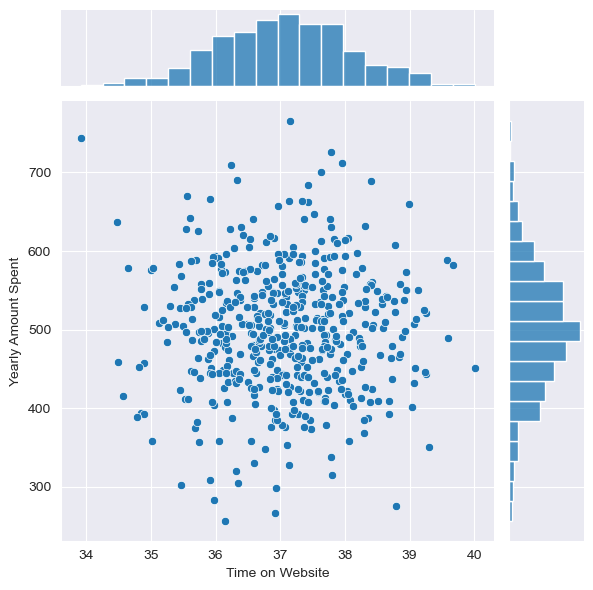

In [5]:
sns.jointplot(x = customers['Time on Website'], y = customers['Yearly Amount Spent'])

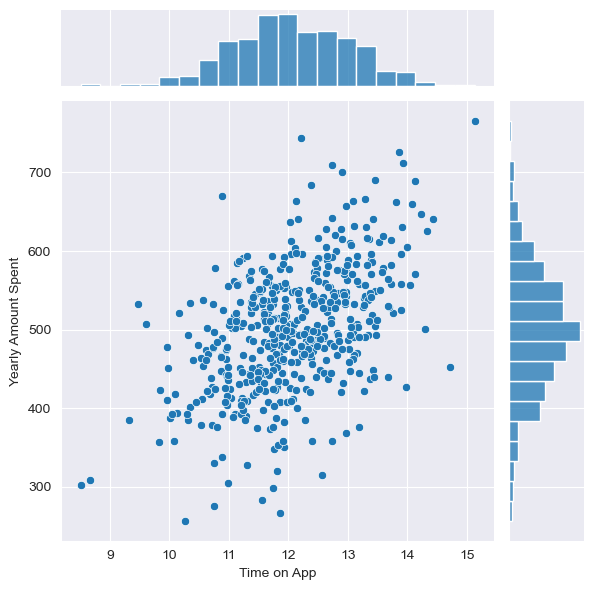

In [6]:
sns.jointplot(x = customers['Time on App'], y = customers['Yearly Amount Spent'])

We see a bit of correlation on this graf

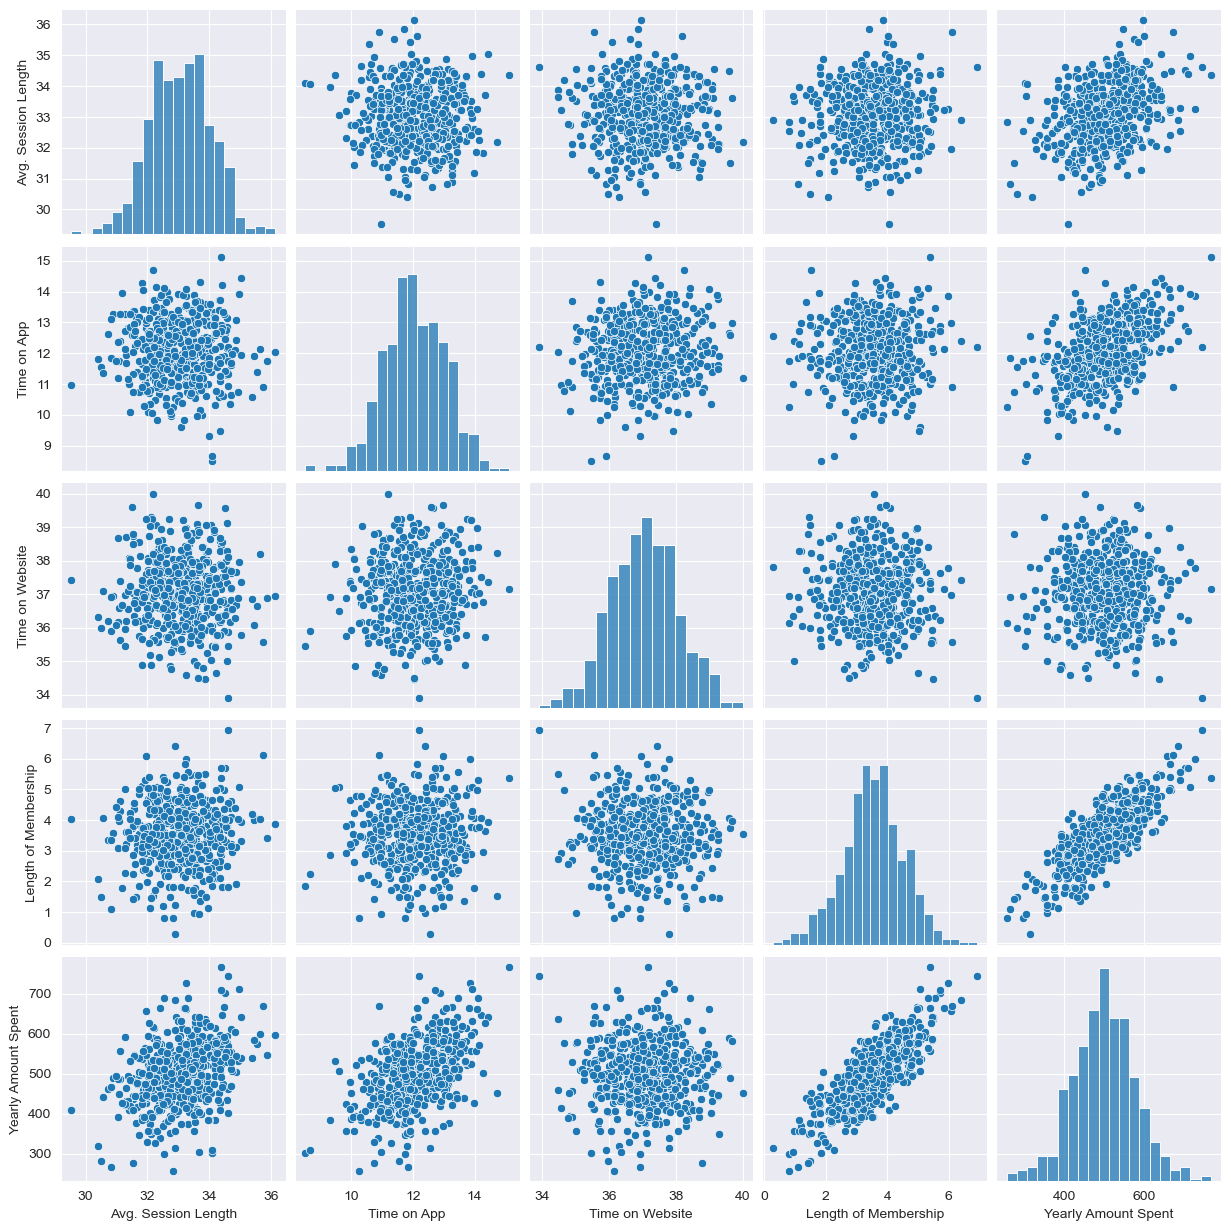

In [7]:
sns.pairplot(customers)

Here, we see straight correlation between LENGTH OF MEMBERSHIP and YEARLY AMOUNT SPENT

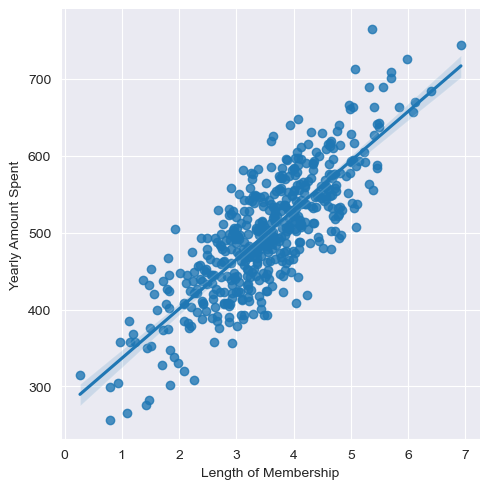

In [9]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = customers)
#Here is more obvious correlation

Let's split our data

In [10]:
X = customers[['Avg. Session Length', 'Time on App',
               'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

<AxesSubplot: ylabel='Yearly Amount Spent'>

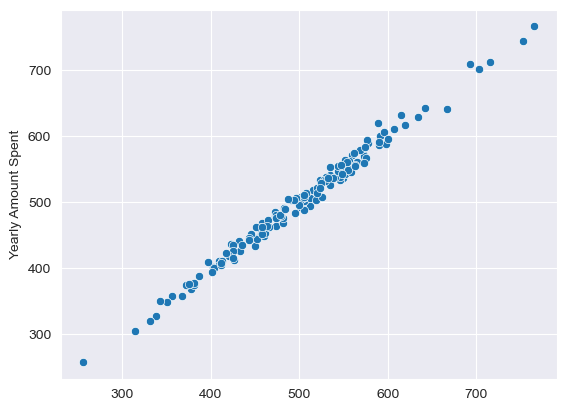

In [16]:
predictions = lm.predict(X_test)
sns.scatterplot(y = y_test, x = predictions)

In [17]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864


C:\Users\danoz\AppData\Local\Temp\ipykernel_15908\3852290723.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions), bins = 50)


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Density'>

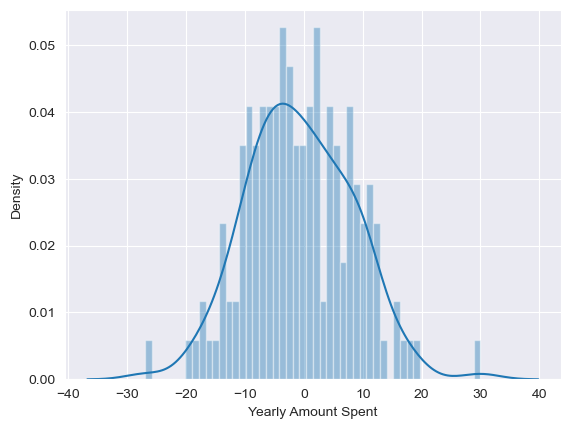

In [18]:
sns.distplot((y_test - predictions), bins = 50)

In [19]:
pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
